In [35]:
import numpy as np
import pandas as pd
from IPython.display import Image, display
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
"""
1. X (categorical) - x-axis spatial coordinate within the Montesinho park map: 1 to 9 
2. Y (categorical) - y-axis spatial coordinate within the Montesinho park map: 1 to 9 
3. month (categorical) - month of the year: 'jan' to 'dec' 
4. day (categorical) - day of the week: 'mon' to 'sun' 
5. FFMC (continuous) - FFMC (Fine Fuel Moisture Code) index from the FWI system: 18.7 to 96.20 
6. DMC (continuous) - DMC (Duff Moisture Code) index from the FWI system: 1.1 to 291.3 
7. DC (continuous) - DC (Drought Code) index from the FWI system: 7.9 to 860.6 
8. ISI (continuous) - ISI (Initial Spread Index) index from the FWI system: 0.0 to 56.10 
9. temp (continuous) - temperature in Celsius degrees: 2.2 to 33.30 
10. RH (contiuous) - relative humidity in %: 15.0 to 100 
11. wind (continuous) - wind speed in km/h: 0.40 to 9.40 
12. rain (continuous) - outside rain in mm/m2 : 0.0 to 6.4 
13. area (continuous) - the burned area of the forest (in ha): 0.00 to 1090.84 
(this output variable is very skewed towards 0.0, thus it may make 
sense to model with the logarithm transform).
"""

def size(x): 
    if x < 0.52:
        return 'small'
    elif 0.52<= x < 6.57: 
        return 'medium'
    return 'large'

forest_fires = pd.read_csv('forestfires.csv')

forest_fires['fire_size'] = forest_fires['area'].apply(size)

forest_fires.info()
# forest_fires.head(50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 14 columns):
X            517 non-null int64
Y            517 non-null int64
month        517 non-null object
day          517 non-null object
FFMC         517 non-null float64
DMC          517 non-null float64
DC           517 non-null float64
ISI          517 non-null float64
temp         517 non-null float64
RH           517 non-null int64
wind         517 non-null float64
rain         517 non-null float64
area         517 non-null float64
fire_size    517 non-null object
dtypes: float64(8), int64(3), object(3)
memory usage: 56.6+ KB


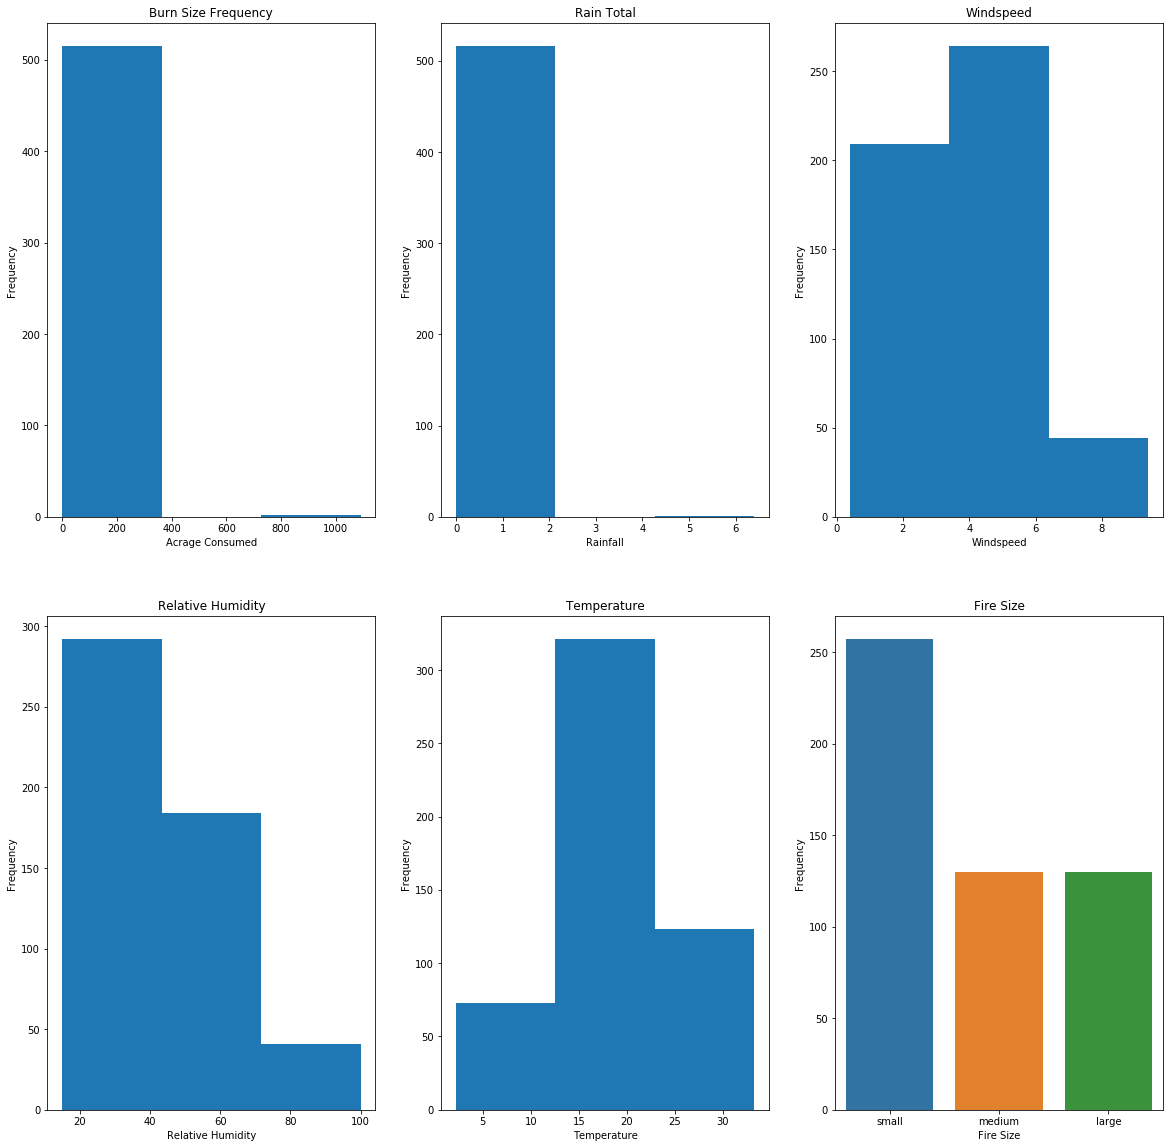

In [37]:
plt.figure(figsize=(20,20))

plt.subplot(2,3,1)
plt.hist(forest_fires['area'],bins=3)
# plt.ylim((0, forest_fires['area'].max()))
plt.xlabel('Acrage Consumed')
plt.ylabel('Frequency')
plt.title('Burn Size Frequency')

plt.subplot(2,3,2)
plt.hist(forest_fires['rain'],bins=3)
plt.xlabel('Rainfall')
plt.ylabel('Frequency')
plt.title('Rain Total')

plt.subplot(2,3,3)
plt.hist(forest_fires['wind'],bins=3)
plt.xlabel('Windspeed')
plt.ylabel('Frequency')
plt.title('Windspeed')

plt.subplot(2,3,4)
plt.hist(forest_fires['RH'],bins=3)
plt.xlabel('Relative Humidity')
plt.ylabel('Frequency')
plt.title('Relative Humidity')

plt.subplot(2,3,5)
plt.hist(forest_fires['temp'],bins=3)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Temperature')

plt.subplot(2,3,6)
sns.countplot(x='fire_size', data=forest_fires)
plt.xlabel('Fire Size')
plt.ylabel('Frequency')
plt.title('Fire Size')

plt.show()

Burn Size Frequency: The most commonly sized fires are < 400 ha (hecares). 
Rain Total: Most fires occur when there has been < 3mm of rain.<br />
Windspeed: Most fires occur when windspeeds are between 4 and 6 km/h.<br />
Relative Humitity: Most fires occur when relative humidity (RH) < 70%.<br />
Burn Size: The majority of fires are small (< 0.52 ha).

Questions to Answer:
1. Can relationship between fire events and environmental conditions be established?
2. If so do certain environmental conditions have a demonstrable influence on fire events?
3. Based on these relationships can probabilities of fire events be assessed for annual seasons? 